In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [170]:
df = pd.read_csv(r'C:\Users\carlo\Downloads\honeyproduction.csv')

In [171]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


For now, we care about the total production of honey per year. Use the .groupby() method provided by pandas to get the mean of totalprod per year.

In [172]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

In [173]:
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


Create a variable called X that is the column of years in this prod_per_year DataFrame.



In [174]:
X = prod_per_year.year

In [175]:
X

0     1998
1     1999
2     2000
3     2001
4     2002
5     2003
6     2004
7     2005
8     2006
9     2007
10    2008
11    2009
12    2010
13    2011
14    2012
Name: year, dtype: int64

After creating X, we will need to reshape it to get it into the right format, using this command: x = x.values.reshape(-1,1)


In [176]:
X = X.values.reshape(-1,1)

In [177]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

Create a variable called y that is the totalprod column in the prod_per_year dataset.




In [178]:
y = prod_per_year.totalprod

In [179]:
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

Using plt.scatter(), plot y vs X as a scatterplot.

Display the plot using plt.show().

Can you see a vaguely linear relationship between these variables?




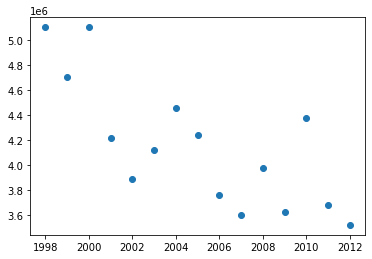

In [180]:
plt.scatter(X, y)
plt.show()
plt.close()

Create a linear regression model from scikit-learn and call it regr.

Use the LinearRegression() constructor from the linear_model module to do this.




In [181]:
regr = linear_model.LinearRegression()

Fit the model to the data by using .fit(). You can feed X into your regr model by passing it in as a parameter of .fit().



In [182]:
regr.fit(X, y)

LinearRegression()

After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) and the intercept of the line (regr.intercept_).




In [183]:
regr.coef_

array([-88303.18915238])

In [184]:
regr.intercept_

181208083.1073298

Create a list called y_predict that is the predictions your regr model would make on the X data.




In [185]:
y_predict = regr.predict(X)

In [186]:
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

Make sure to call plt.show() after plotting the line.




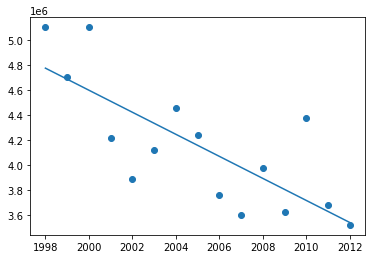

In [187]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()
plt.close()

Let’s predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050. The code below makes a NumPy array with the numbers 1 through 10

nums = np.array(range(1, 11))


In [188]:
X_future = np.arange(2013, 2050)

In [189]:
X_future

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049])

In [190]:
nums = np.array(range(1,11))

In [191]:
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

After creating that array, we need to reshape it for scikit-learn.

X_future = X_future.reshape(-1, 1)
You can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.



In [192]:
X_future = X_future.reshape(-1,1)

In [193]:
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.




In [194]:
future_predict = regr.predict(X_future)


In [195]:
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919])

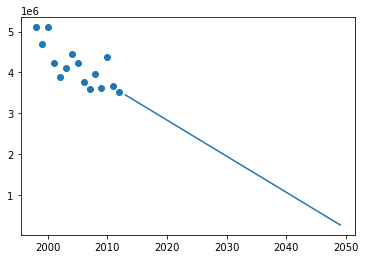

In [ ]:
plt.scatter(X, y)
plt.plot(X_future, future_predict)
plt.show()
plt.close()

To determine the predicted honey production in the year 2050 according to this model, you can simply look at the last value in the 'future_predict' array.


In [ ]:
prediction_2050 = future_predict[-1]


In [ ]:
prediction_2050

274848.5340991914